In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import correlaidmatplotlib
from correlaidmatplotlib import add_title_and_subtitle, add_signature, remove_axes_labels, set_correlaid_style

In [2]:
# load data
df = pd.read_csv(r'..\data\processed\trips_custom_variables.csv', dtype = {'VORIHORAINI':str, 'VDESHORAFIN':str}, parse_dates = ['start_time','end_time'])

## Trip counts per age and purpose

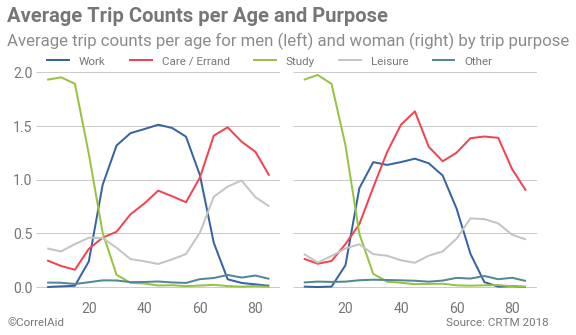

In [3]:
fig, ax = plt.subplots(1,2, figsize = (8,4), sharey=True)

df_ind = df.loc[:,["ID_HOGAR", "ID_IND", "sex", "rounded_age", "ELE_G_POND"]].drop_duplicates()
order = ["work", "care / errand", "study", "leisure", "other"]
# Men
sum_people_by_age = df_ind.loc[df.sex == "Man"].groupby(["rounded_age"]).agg({"ELE_G_POND": "sum"}).reset_index()
sum_people_by_age.rename(columns = {'ELE_G_POND': 'people_count'}, inplace = True)

t_age = df.loc[df.sex == "Man"].groupby(["rounded_age", "motive_simple"]).agg({"ELE_G_POND_ESC2": "sum"}).reset_index()
t_age = t_age.join(sum_people_by_age.set_index("rounded_age"), on = "rounded_age")
t_age["trips_by_person"] = t_age.ELE_G_POND_ESC2 / t_age.people_count
t_age = t_age[t_age.rounded_age < 90]
t_age = t_age.pivot(index='rounded_age', columns='motive_simple', values='trips_by_person')
t_age = t_age[order]
t_age.sort_index().plot(kind = "line", ax=ax[0])

# Women
sum_people_by_age = df_ind.loc[df.sex == "Woman"].groupby(["rounded_age"]).agg({"ELE_G_POND": "sum"}).reset_index()
sum_people_by_age.rename(columns = {'ELE_G_POND': 'people_count'}, inplace = True)

t_age = df.loc[df.sex == "Woman"].groupby(["rounded_age", "motive_simple"]).agg({"ELE_G_POND_ESC2": "sum"}).reset_index()
t_age = t_age.join(sum_people_by_age.set_index("rounded_age"), on = "rounded_age")
t_age["trips_by_person"] = t_age.ELE_G_POND_ESC2 / t_age.people_count
t_age = t_age[t_age.rounded_age < 90]
t_age = t_age.pivot(index='rounded_age', columns='motive_simple', values='trips_by_person')
t_age = t_age[order]
t_age.sort_index().plot(kind = "line", ax=ax[1])

ax[1].legend().set_visible(False)

handles, _ = ax[1].get_legend_handles_labels()
labels = ["Work", "Care / Errand", "Study", "Leisure", "Other"]
ax[0].legend(handles, labels, loc="upper left", bbox_to_anchor=(-0., 1.08), ncol=5, fontsize="small")

remove_axes_labels(fig)

ax[0].grid(axis='x')
ax[1].grid(axis='x')

fig.subplots_adjust(wspace=0.05)

add_title_and_subtitle(fig, "Average Trip Counts per Age and Purpose", "Average trip counts per age for men (left) and woman (right) by trip purpose", title_fontsize="x-large", subtitle_fontsize="large", title_y_pos=0.08, title_x_pos=0.03, subtitle_y_pos=-0.01, subtitle_x_pos=0.03)
add_signature(fig, source="CRTM 2018", fontsize="small", copyright_x_pos=0.03, source_x_pos=-0.03, y_pos=-0.0)

plt.savefig("20201220_gender_mobility_motive.png", facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight', 
               transparent=True,
               pad_inches=0, dpi=200)

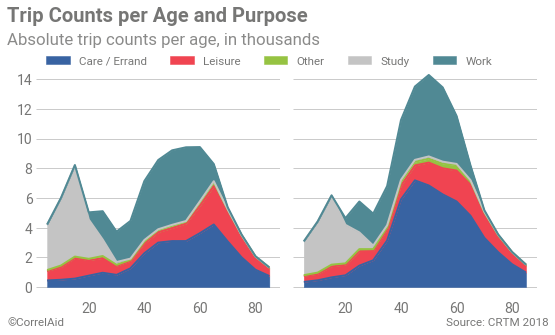

In [4]:
fig, ax = plt.subplots(1,2, figsize = (8,4), sharey=True)

# amount of trips by purpose by age and sex
t_age = df.loc[df.sex == "Man"].groupby(["rounded_age", "motive_simple"]).agg({"ELE_G_POND_ESC2": "count"}).reset_index()
t_age = t_age[t_age.rounded_age < 90]
t_age = t_age.pivot(index='rounded_age', columns='motive_simple', values='ELE_G_POND_ESC2')
t_age_thousands = t_age / 1000.
t_age_thousands.sort_index().plot(kind = "area", ax=ax[0])

# weighted amount of trips by purpose by age and sex
t_age = df.loc[df.sex == "Woman"].groupby(["rounded_age", "motive_simple"]).agg({"ELE_G_POND_ESC2": "count"}).reset_index()
t_age = t_age[t_age.rounded_age < 90]
t_age = t_age.pivot(index='rounded_age', columns='motive_simple', values='ELE_G_POND_ESC2')
t_age_thousands = t_age / 1000.
t_age_thousands.sort_index().plot(kind = "area", ax=ax[1])

ax[1].legend().set_visible(False)

handles, _ = ax[1].get_legend_handles_labels()
labels = ['Care / Errand', 'Leisure', 'Other', 'Study', 'Work']
ax[0].legend(handles, labels, loc="upper left", bbox_to_anchor=(-0., 1.08), ncol=5, fontsize="small")

remove_axes_labels(fig)

ax[0].grid(axis='x')
ax[1].grid(axis='x')

fig.subplots_adjust(wspace=0.05)

add_title_and_subtitle(fig, "Trip Counts per Age and Purpose", "Absolute trip counts per age, in thousands", title_fontsize="x-large", subtitle_fontsize="large", title_y_pos=0.08, title_x_pos=0.03, subtitle_y_pos=-0.01, subtitle_x_pos=0.03)
add_signature(fig, source="CRTM 2018", fontsize="small", copyright_x_pos=0.03, source_x_pos=-0.03, y_pos=-0.0)

## Average length of Daily Distance Travelled

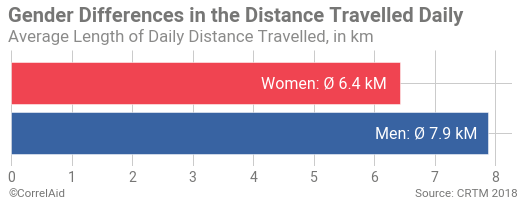

In [5]:
fig, ax = plt.subplots(figsize = (8,2))

# weighted average distance by sex
df["weighted_dist"] = df.DISTANCIA_VIAJE * df.ELE_G_POND_ESC2

# get the weighted mean distance
df_sex_sum = df.groupby("sex").sum()
df_sex_sum.weighted_dist / df_sex_sum.ELE_G_POND_ESC2 

distance_means =df_sex_sum.weighted_dist / df_sex_sum.ELE_G_POND_ESC2 

ax.text(x=6.4 - 0.2, y=0.9, s="Women: Ø 6.4 kM", fontsize = 16, color="white", ha="right")
ax.text(x=7.9 - 0.2, y=-0.1, s="Men: Ø 7.9 kM", fontsize = 16, color="white",  ha="right")

distance_means.plot(kind="barh", ax=ax, color=["C0", "C1"], width=.85 )

add_title_and_subtitle(fig, "Gender Differences in the Distance Travelled Daily", 
                       "Average Length of Daily Distance Travelled, in km", 
                       title_fontsize="x-large", subtitle_fontsize="large", 
                       title_y_pos=0.18, title_x_pos=0.075, subtitle_y_pos=0.03, subtitle_x_pos=0.075)

add_signature(fig, source="CRTM 2018", fontsize="smaller", copyright_x_pos=0.075, source_x_pos=-0.04, y_pos=-0.08)

ax.set_yticklabels([])
ax.set_ylabel("")

plt.savefig("20201220_gender_mobility_dist.png", facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight', 
               transparent=True,
               pad_inches=0, dpi=200)

## Gender Differences in the Modal Split

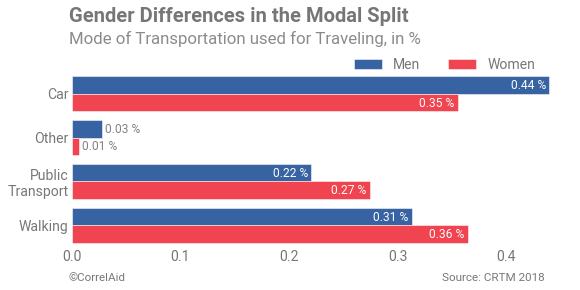

In [6]:
# modal split women weighted from above
modes_weighted = df[df.sex == 'Woman'].groupby(["mode_simple"]).sum()
modes_sex_sum = modes_weighted["ELE_G_POND_ESC2"].sum()
weighted_modes_woman = pd.DataFrame(modes_weighted['ELE_G_POND_ESC2'] / modes_sex_sum).reset_index()
weighted_modes_woman["gender"] = "Women"

# modal split men weighted from above
modes_weighted = df[df.sex == 'Man'].groupby(["mode_simple"]).sum()
modes_sex_sum = modes_weighted["ELE_G_POND_ESC2"].sum()
weighted_modes_man = pd.DataFrame(modes_weighted['ELE_G_POND_ESC2'] / modes_sex_sum).reset_index()
weighted_modes_man["gender"] = "Men"

weightd_modes = pd.concat([weighted_modes_man, weighted_modes_woman])


fig, ax = plt.subplots(figsize = (8,3))

add_title_and_subtitle(fig, "Gender Differences in the Modal Split", 
                       "Mode of Transportation used for Traveling, in %", 
                       title_fontsize="x-large", subtitle_fontsize="large", 
                       title_y_pos=0.18, title_x_pos=0.075, subtitle_y_pos=+0.07, subtitle_x_pos=0.075)

add_signature(fig, source="CRTM 2018", fontsize="smaller", copyright_x_pos=0.075, source_x_pos=-0.1, y_pos=-0.05)


sns.barplot(data = weightd_modes, y="mode_simple", x="ELE_G_POND_ESC2", hue="gender", saturation=1., ax=ax, palette=["C0", "C1"], orient="horizontal")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend(frameon=False, loc="upper right", ncol=2, bbox_to_anchor=(0.95,1.15))

for i, label in enumerate(ax.get_yticklabels()): 
    if label.get_text() == "other":
        male_value = weightd_modes.loc[(weightd_modes.mode_simple==label.get_text()) & (weightd_modes.gender=="Men"), "ELE_G_POND_ESC2"]
        ax.text(male_value+0.003, i-0.18,  s='%.2f %%' % (male_value),va='center',  ha='left',  color='grey', fontsize=12)

        female_value = weightd_modes.loc[(weightd_modes.mode_simple==label.get_text()) & (weightd_modes.gender=="Women"), "ELE_G_POND_ESC2"]
        ax.text(female_value+0.003,i+0.21, s='%.2f %%' % (female_value), va='center', ha='left', color='grey', fontsize=12)
    else:
        male_value = weightd_modes.loc[(weightd_modes.mode_simple==label.get_text()) & (weightd_modes.gender=="Men"), "ELE_G_POND_ESC2"]
        ax.text(male_value-0.003,i-0.18, s='%.2f %%' % (male_value), va='center',  ha='right', color='white', fontsize=12)

        female_value = weightd_modes.loc[(weightd_modes.mode_simple==label.get_text()) & (weightd_modes.gender=="Women"), "ELE_G_POND_ESC2"]
        ax.text(female_value-0.003, i+0.21, s='%.2f %%' % (female_value), va='center',  ha='right', color='white',  fontsize=12)

ax.set_yticklabels(["Car", "Other", "Public\nTransport", "Walking"])

plt.savefig("20201220_gender_mobility_modalsplit.png", facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight', transparent=True, pad_inches=0, dpi=200)

## Trips of Working People over the Course of the Day

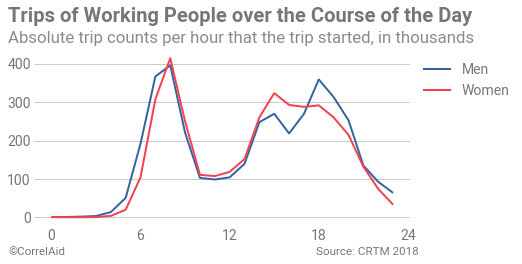

In [7]:
# weighted only working by gender

fig, ax = plt.subplots()

df.loc[df.start_time.notna(), "start_hour"] = df.loc[df.start_time.notna(), "start_time"].apply(lambda x: x.hour)
g = df[df.activity_simple == "working"].groupby(["sex", "start_hour"]).agg({"ELE_G_POND_ESC2": "sum"}).reset_index()
g_plot = g.pivot(index='start_hour', columns='sex', values='ELE_G_POND_ESC2')

g_plot_thousands = g_plot/1000
g_plot_thousands.columns = ["Men", "Women"]
g_plot_thousands.plot(kind = "line", figsize = (6,3), ax=ax)
ax.grid(axis='x')

ax.set_xticks(range(0,24+1,6))

set_correlaid_style(fig, "Trips of Working People over the Course of the Day", 
                        "Absolute trip counts per hour that the trip started, in thousands", 
                         source="CRTM 2018", title_fontsize="x-large", 
                        subtitle_fontsize="large", signature_fontsize="smaller",
                        title_y_pos=0.08, title_x_pos=0.02, subtitle_y_pos=-0.03, subtitle_x_pos=0.02,
                        copyright_x_pos=0.02, source_x_pos=-0.03, signature_y_pos=-0.03,
                        legend_x_pos=0.00, legend_y_pos=0.0)

plt.savefig("20201220_gender_mobility_rushhour.png", facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight', transparent=True, pad_inches=0, dpi=200)

## Trips by Age and Gender

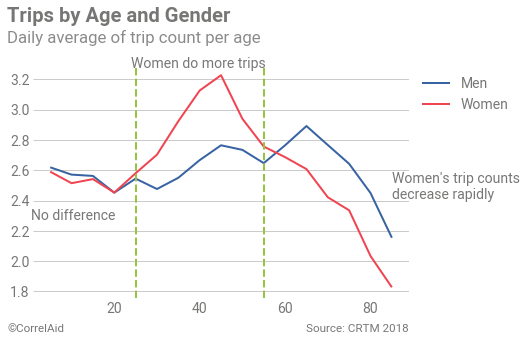

In [8]:
fig, ax = plt.subplots()
trips_by_ind = df.groupby(["ID_HOGAR", "ID_IND", "sex", "rounded_age"]).ELE_G_POND.agg(['mean', 'sum'])

# group by age
trips_by_age = trips_by_ind.reset_index().groupby(["sex", "rounded_age"]).sum().reset_index()
# remove over 90 year olds (too few people)
trips_by_age = trips_by_age[trips_by_age.rounded_age < 90]
# calc weighted trip cound for each age and gender
trips_by_age["weighted_tripcount"] = trips_by_age['sum'] / trips_by_age['mean']

# plot
trips_by_age = trips_by_age.pivot(index='rounded_age', columns='sex', values='weighted_tripcount')
trips_by_age.columns = ["Men", "Women"]
trips_by_age.sort_index().plot(kind = "line", ax=ax )

ax.grid(axis='x')

plt.axvline(25, color="C2", ls="--")
plt.axvline(55, color="C2", ls="--")
# ax.set_ylim([1.8, 2.9])

ax.text(0.5,2.3, s="No difference", va='center',  ha='left', fontsize=14)
ax.text(24.0,3.3, s="Women do more trips", va='center',  ha='left', fontsize=14)
ax.text(85.0,2.49, s="Women's trip counts\ndecrease rapidly", va='center',  ha='left', fontsize=14)

set_correlaid_style(fig, "Trips by Age and Gender", 
                        "Daily average of trip count per age", 
                         source="CRTM 2018", title_fontsize="x-large", 
                        subtitle_fontsize="large", signature_fontsize="smaller",
                        title_y_pos=0.08, title_x_pos=0.02, subtitle_y_pos=0.00, subtitle_x_pos=0.02,
                        copyright_x_pos=0.02, source_x_pos=-0.05, signature_y_pos=-0.02,
                        legend_x_pos=0.00, legend_y_pos=0.0)

plt.savefig("20201220_gender_mobility_tripcount.png", facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight', transparent=True, pad_inches=0, dpi=200)